In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind, levene
from sklearn.linear_model import LassoCV
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns #
import matplotlib.pyplot as plt #
from sklearn.metrics import roc_curve, roc_auc_score, classification_report #

In [4]:
xlsx_a = 'C:/Users/YJJ/Desktop/test/CC.xlsx'
xlsx_b = 'C:/Users/YJJ/Desktop/test/KK.xlsx'
data_a = pd.read_excel(xlsx_a)
data_b = pd.read_excel(xlsx_b)
print(data_a.shape,data_b.shape)

(140, 851) (149, 851)


In [5]:
rows_a,cols_a = data_a.shape
rows_b,cols_b = data_b.shape
labels_a = np.zeros(rows_a)
labels_b = np.ones(rows_b)
data_a.insert(0, 'label', labels_a)
data_b.insert(0, 'label', labels_b)
data = pd.concat([data_a,data_b])

In [6]:
data_train, data_test = train_test_split(data,test_size=0.3,random_state = 15)
data_train_a = data_train[:][data_train['label'] == 0]
data_train_b = data_train[:][data_train['label'] == 1]
data_test_a = data_test[:][data_test['label'] == 0]
data_test_b = data_test[:][data_test['label'] == 1]
print(data_train_a.shape)
print(data_train_b.shape)
print(data_test_a.shape)
print(data_test_b.shape)

(97, 852)
(105, 852)
(43, 852)
(44, 852)


In [7]:
index = []
for colName in data.columns[:]:
    if levene(data_train_a[colName], data_train_b[colName])[1] > 0.05: 
        if ttest_ind(data_train_a[colName], data_train_b[colName])[1] < 0.05: 
            index.append(colName)
    else: 
        if ttest_ind(data_train_a[colName], data_train_b[colName],equal_var=False)[1] < 0.05: 
            index.append(colName)
print(len(index))
print(index)

E:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


371
['label', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_Maximum2DDiameterRow', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_Energy', 'original_firstorder_Maximum', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Range', 'original_firstorder_TotalEnergy', 'original_glcm_Autocorrelation', 'original_glcm_Idmn', 'original_glcm_Idn', 'original_glcm_Imc1', 'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_HighGrayLevelRunEmphasis', 'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis', 'original_glrlm_RunLengthNonUniformity', 'original_glrlm_RunPercentage', 'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 

In [11]:
data_train_a = data_train_a[index]
data_train_b = data_train_b[index]
data_train = pd.concat([data_train_a, data_train_b])
data_train = shuffle(data_train)
data_train.index = range(len(data_train))
X_train = data_train[data_train.columns[1:]]
# 注意下面两行在训练集与测试集上的区别
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = index[1:]
y_train = data_train['label']

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [12]:
data_test_a = data_test_a[index]
data_test_b = data_test_b[index]
data_test = pd.concat([data_test_a, data_test_b])
data_test = shuffle(data_test)
data_test.index = range(len(data_test))
X_test = data_test[data_test.columns[1:]]
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = index[1:]
y_test = data_test['label']

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [13]:
alphas = np.logspace(-5,1,50)
model_lassoCV = LassoCV(alphas = alphas, max_iter = 100000).fit(X_train,y_train)
coef = pd.Series(model_lassoCV.coef_, index = X_train.columns)
print(model_lassoCV.alpha_)
print('%s %d'%('Lasso picked',sum(coef != 0)))
index = coef[coef != 0].index
X_train_raw = X_train
X_train = X_train[index]
X_test = X_test[index]

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:113: DeprecationWarning: `np.bool` is 

0.015264179671752334
Lasso picked 28


In [14]:
print(index)

Index(['original_shape_Flatness', 'original_shape_Maximum2DDiameterRow',
       'original_shape_Sphericity', 'original_firstorder_10Percentile',
       'original_glcm_Idmn', 'original_glszm_LargeAreaHighGrayLevelEmphasis',
       'original_glszm_SmallAreaLowGrayLevelEmphasis',
       'wavelet-LLH_firstorder_Skewness', 'wavelet-LLH_glcm_Correlation',
       'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis',
       'wavelet-LLH_ngtdm_Contrast', 'wavelet-LLH_gldm_DependenceEntropy',
       'wavelet-LLH_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LHL_firstorder_Skewness',
       'wavelet-LHL_gldm_LargeDependenceHighGrayLevelEmphasis',
       'wavelet-LHH_firstorder_Skewness',
       'wavelet-LHH_glszm_GrayLevelNonUniformityNormalized',
       'wavelet-LHH_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-HLL_glcm_MCC', 'wavelet-HLL_glrlm_LowGrayLevelRunEmphasis',
       'wavelet-HLL_glszm_LargeAreaHighGrayLevelEmphasis',
       'wavelet-HLH_firstorder_Mean', 'wavelet-HLH

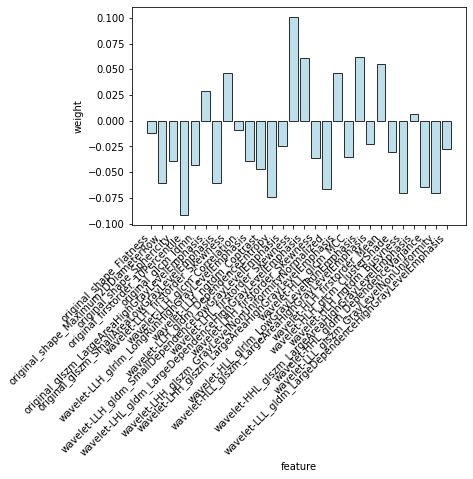

In [15]:
plt.figure()
x_values = np.arange(len(index))
y_values = coef[coef != 0]
plt.bar(x_values, y_values        #横向bar使用：barh
        , color = 'lightblue'     #设置bar的颜色
        , edgecolor = 'black'     #设置bar边框颜色
        , alpha = 0.8             #设置不透明度
       )
plt.xticks(x_values,index
           , rotation='45'        #旋转xticks
           , ha = 'right'         #xticks的水平对齐方式
           ,va = 'top'            #xticks的垂直对齐方式
          )
plt.xlabel("feature")             #横轴名称
plt.ylabel("weight")              #纵轴名称
plt.show()

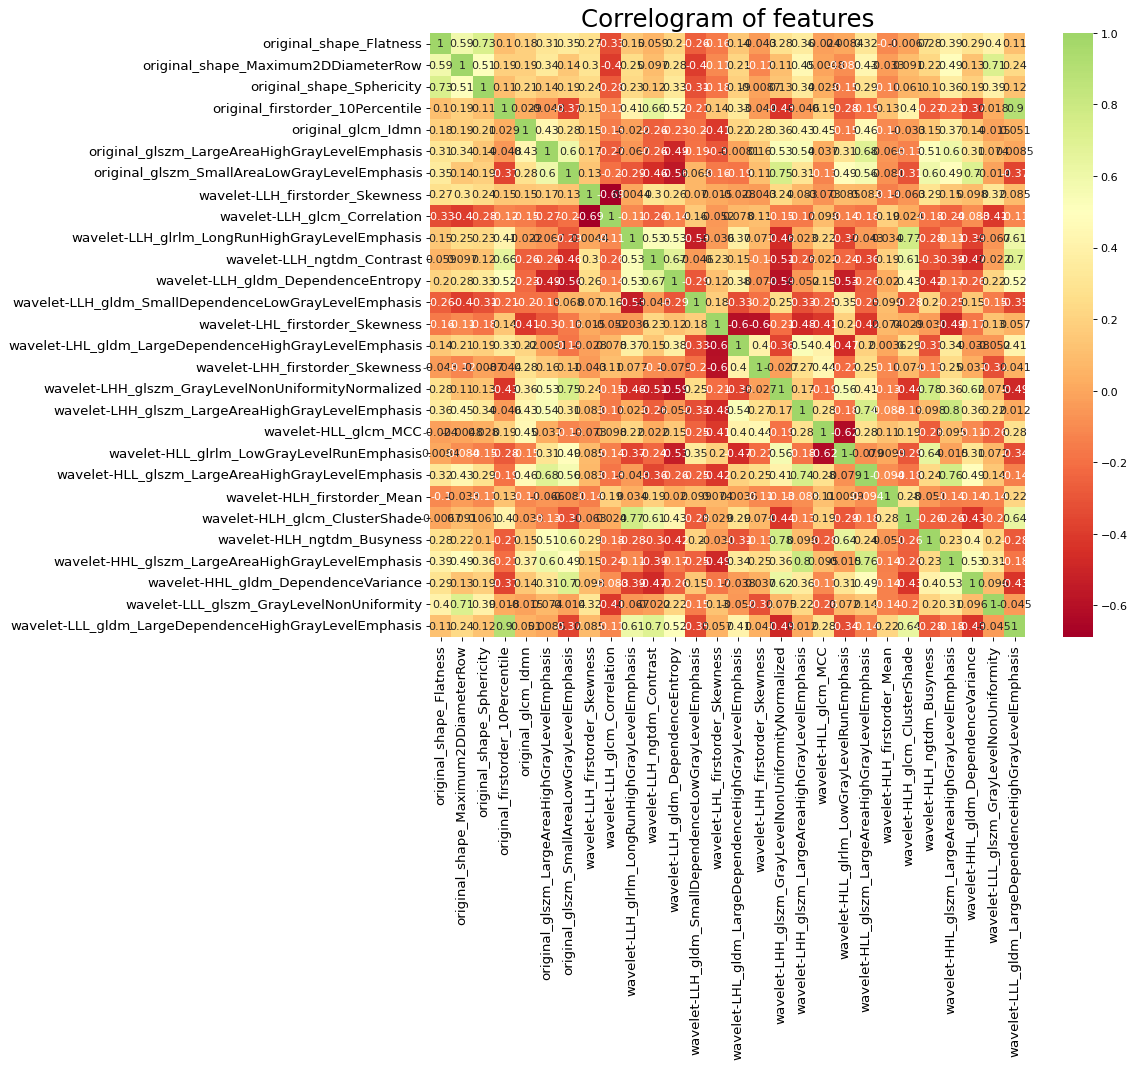

In [16]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(X_train.corr()                           #计算特征间的相关性
            , xticklabels=X_train.corr().columns
            , yticklabels=X_train.corr().columns
            , cmap='RdYlGn'
            , center=0.5
            , annot=True)
plt.title('Correlogram of features', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

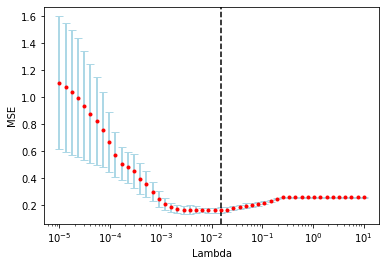

In [17]:
MSEs = model_lassoCV.mse_path_
"""
MSEs_mean, MSEs_std = [], []
for i in range(len(MSEs)):
    MSEs_mean.append(MSEs[i].mean())
    MSEs_std.append(MSEs[i].std())
"""
MSEs_mean = np.apply_along_axis(np.mean,1,MSEs)
MSEs_std = np.apply_along_axis(np.std,1,MSEs)

plt.figure()
plt.errorbar(model_lassoCV.alphas_,MSEs_mean    
             , yerr=MSEs_std                    
             , fmt="o"                         
             , ms=3                            
             , mfc="r"                          
             , mec="r"                          
             , ecolor="lightblue"               
             , elinewidth=2                    
             , capsize=4                        
             , capthick=1)                      
plt.semilogx()
plt.axvline(model_lassoCV.alpha_,color = 'black',ls="--")
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.show()

E:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


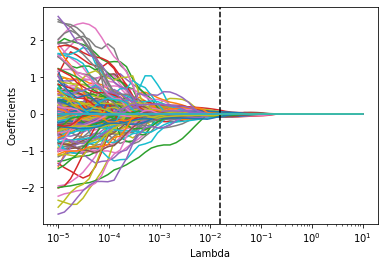

In [18]:
coefs = model_lassoCV.path(X_train_raw,y_train,alphas = alphas, max_iter = 100000)[1].T
plt.figure()
plt.semilogx(model_lassoCV.alphas_,coefs, '-')
plt.axvline(model_lassoCV.alpha_,color = 'black',ls="--")
plt.xlabel('Lambda')
plt.ylabel('Coefficients')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [20]:
model_rf = RandomForestClassifier(random_state=20)
model_rf.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:487: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
E:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [21]:
y_pred_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)[:, 1]

E:\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
E:\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:357: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
E:\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is s

In [22]:
model_svm = SVC(kernel='linear', random_state=20, probability=True)
model_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=20,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred_svm = model_svm.predict(X_test)
y_pred_prob_svm = model_svm.predict_proba(X_test)[:, 1]

In [24]:
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
specificity_rf = tn_rf / (tn_rf + fp_rf)
sensitivity_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, y_pred_svm).ravel()
specificity_svm = tn_svm / (tn_svm + fp_svm)
sensitivity_svm = recall_score(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

print("Random Forest:")
print("Specificity: ", specificity_rf)
print("Sensitivity: ", sensitivity_rf)
print("Accuracy: ", accuracy_rf)
print("AUC: ", auc_rf)

print("Support Vector Machine:")
print("Specificity: ", specificity_svm)
print("Sensitivity: ", sensitivity_svm)
print("Accuracy: ", accuracy_svm)
print("AUC: ", auc_svm)

Random Forest:
Specificity:  0.9534883720930233
Sensitivity:  0.8409090909090909
Accuracy:  0.896551724137931
AUC:  0.9386892177589852
Support Vector Machine:
Specificity:  0.8604651162790697
Sensitivity:  0.8409090909090909
Accuracy:  0.8505747126436781
AUC:  0.9164904862579282


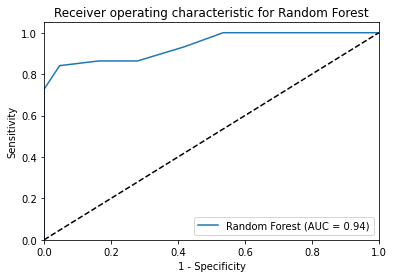

In [25]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic for Random Forest')
plt.legend(loc="lower right")
plt.show()

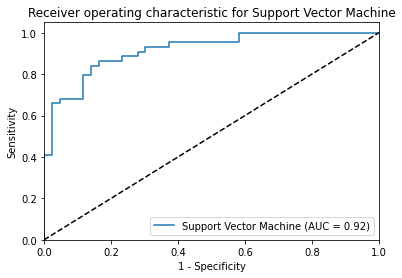

In [26]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (AUC = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic for Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

Logistic Regression:
Specificity:  0.9069767441860465
Sensitivity:  0.8181818181818182
Accuracy:  0.8620689655172413
AUC:  0.9328752642706131


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


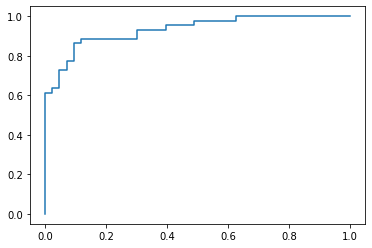

In [27]:
model_lr = LogisticRegression(random_state=20)
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
y_pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]

tn_lr, fp_lr, fn_lr, tp_lr = confusion_matrix(y_test, y_pred_lr).ravel()
specificity_lr = tn_lr / (tn_lr + fp_lr)
sensitivity_lr = recall_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

print("Logistic Regression:")
print("Specificity: ", specificity_lr)
print("Sensitivity: ", sensitivity_lr)
print("Accuracy: ", accuracy_lr)
print("AUC: ", auc_lr)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)

XGBoost:
Specificity:  0.9302325581395349
Sensitivity:  0.8863636363636364
Accuracy:  0.9080459770114943
AUC:  0.9756871035940804


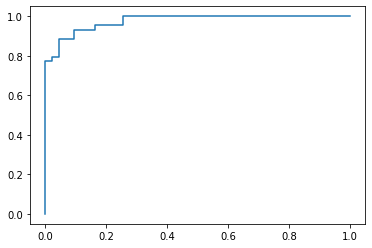

In [28]:
model_xgb = xgb.XGBClassifier(random_state=20)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
y_pred_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(y_test, y_pred_xgb).ravel()
specificity_xgb = tn_xgb / (tn_xgb + fp_xgb)
sensitivity_xgb = recall_score(y_test, y_pred_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print("XGBoost:")
print("Specificity: ", specificity_xgb)
print("Sensitivity: ", sensitivity_xgb)
print("Accuracy: ", accuracy_xgb)
print("AUC: ", auc_xgb)

fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)

In [30]:
import matplotlib.pyplot as plt

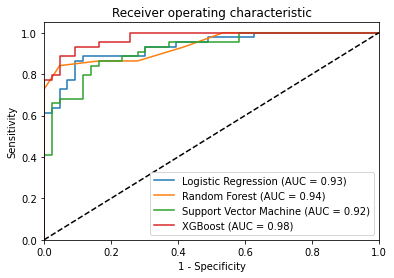

In [34]:
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % auc_lr)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_svm, tpr_svm, label='Support Vector Machine (AUC = %0.2f)' % auc_svm)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()